# Inverse Problems Exercises: 2024s s02 (non-sc)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): Ruben Hartenstein

YOUR ANSWER HERE

## I06: Convolution theorem

In [50]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import toeplitz

In [51]:
from urllib.request import urlopen
import matplotlib.image as mpimg

# create a file-like object from the url
file_input = urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Grayscale_Cat.jpg/320px-Grayscale_Cat.jpg')

# load the input image
image_input = mpimg.imread(file_input, 'jpg')

# pick the central line as signal f
f_true = image_input[image_input.shape[0] // 2, :]

### Imaging model
The imaging model can be represented by
$$
g = h \otimes f_\text{true} = Af_\text{true} = \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \} .
$$
* $f_\text{true}$ is the input signal
* $h$ is the point spread function (kernel)
* $\otimes$ is the convolution operator
* $A$ is the Toeplitz matrix of $h$
* $\mathcal{F}$ and $\mathcal{F}^{-1}$ are the Fourier transform operator and inverse Fourier transform operator
* $g$ is the output signal

### Gaussian kernel
Implement the Gaussian kernel function $h$
* Given the standard deviation of the Gaussian $\sigma_h$
* Given the kernel size $s_h$
* Define the origin of the kernels in the middle of the array
* Normalize the kernel, i.e. the sum of the kernel elements equals to $1$
* Implement the function `get_gaussian_1d()` (using `numpy.array`)
  
Generate the Gaussian kernels
* Parameter options of $(\sigma_h, s_h)$
  - (1, 5)
  - (4, 21)
  - (7, 35)
  - (20, 35)
* Save the outputs in the variable `list_h_psf` (as `list` of `numpy.array`)

Display the result
* Plot the kernels in `list_h_psf` in the same order of the parameter options in the axes `ax`
* Show the legend in the axes `ax`

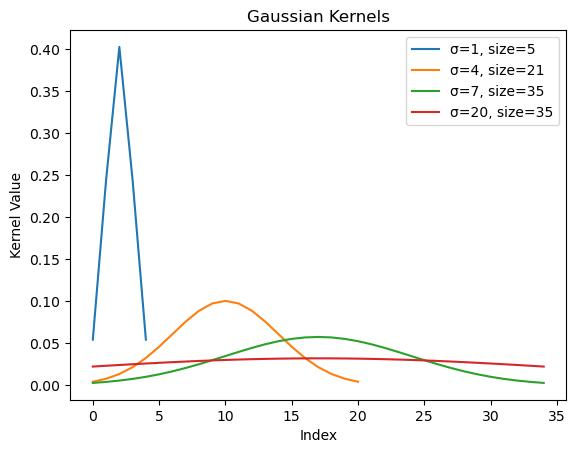

In [52]:
def gaussian(x, sigma):
    return np.exp(-(x ** 2) / (2 * sigma ** 2)) / (np.sqrt(2 * np.pi) * sigma)

def get_gaussian_1d(sigma, kernel_size):
    """ Returns a gaussian kernel, with a specified kernel size.
    Low pass (blurring) kernel.

    :param sigma: Standard deviation of the Gaussian function.
    :param kernel_size: Kernel size.
    :returns: normalized Gaussian kernel.
    """   
    # Determine the range of values for the kernel, centered around the origin
    x = np.arange(-(kernel_size // 2), kernel_size // 2 + 1)
    # Calculate the Gaussian function values
    h = gaussian(x, sigma)
    
    # Normalize the kernel
    h /= np.sum(h)
   
    return h
   
# Generate the Gaussian kernels for different parameter options
list_h_psf = []
options = [(1, 5), (4, 21), (7, 35), (20, 35)]

for sigma, size in options:
    kernel = get_gaussian_1d(sigma, size)
    list_h_psf.append(kernel)

fig, ax = plt.subplots() # Create a figure and an axes.

for i, (sigma, size) in enumerate(options):
    ax.plot(list_h_psf[i], label=f"σ={sigma}, size={size}")

ax.legend()
ax.set_xlabel("Index")
ax.set_ylabel("Kernel Value")
ax.set_title("Gaussian Kernels")

plt.show()

In [53]:
# This cell contains hidden tests.


In [54]:
# This cell contains hidden tests.


### Convolution operation
Convolution with the Gaussian kernels $g = h \otimes f_\text{true}$ (using `numpy.convolve()`)
* Apply the kernels in `list_h_psf` to `f_true`
* Return the outputs with the same length as `f_true`
* Save the outputs in the variable `list_g_cov` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_g_cov` in the same order of the parameter options in the axes `ax`
* Plot `f_true` in the axes `ax` (after `list_g_cov`)
* Show the legend in the axes `ax`

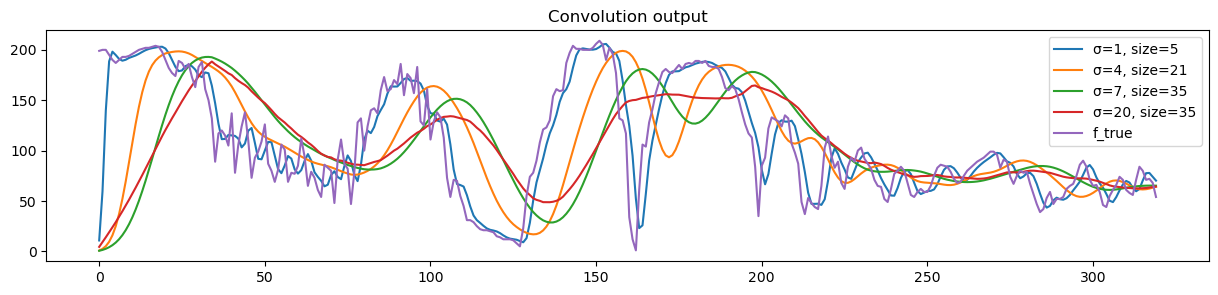

In [55]:
fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
ax.set_title('Convolution output')

# Perform convolution operation
list_g_cov = [np.convolve(f_true, kernel, mode='full') for kernel in list_h_psf]
list_g_cov = [g[:len(f_true)] for g in list_g_cov]

for i, (sigma, size) in enumerate(options):
    ax.plot(list_g_cov[i], label=f"σ={sigma}, size={size}")

ax.plot(f_true, label="f_true")

ax.legend()
plt.show()

In [56]:
# This cell contains hidden tests.


### Toeplitz matrix
See: https://en.wikipedia.org/wiki/Toeplitz_matrix#Discrete_convolution

Implement the Toeplitz matrix $A$ corresponding to $h$ (using `scipy.linalg.toeplitz()` optionally)
  - Given $h$
  - Given signal size $s_f$
  - Take the zero-padding option, i.e the input array values outside the bounds of the array are assigned $0$
  - Implement the function `get_convolution_matrix()` (using `numpy.array`)
  
Generate the Toeplitz matrices
* Return the outputs of each kernel in `list_h_psf` for `f_true`
* Save the outputs in the variable `list_A_psf` (as `list` of `numpy.array`)

Display the result
* Plot the matrices in `list_A_psf` as grayscale images in the same order of the parameter options in the subplots of `axs`
* Add proper titles to the subplots of `axs`

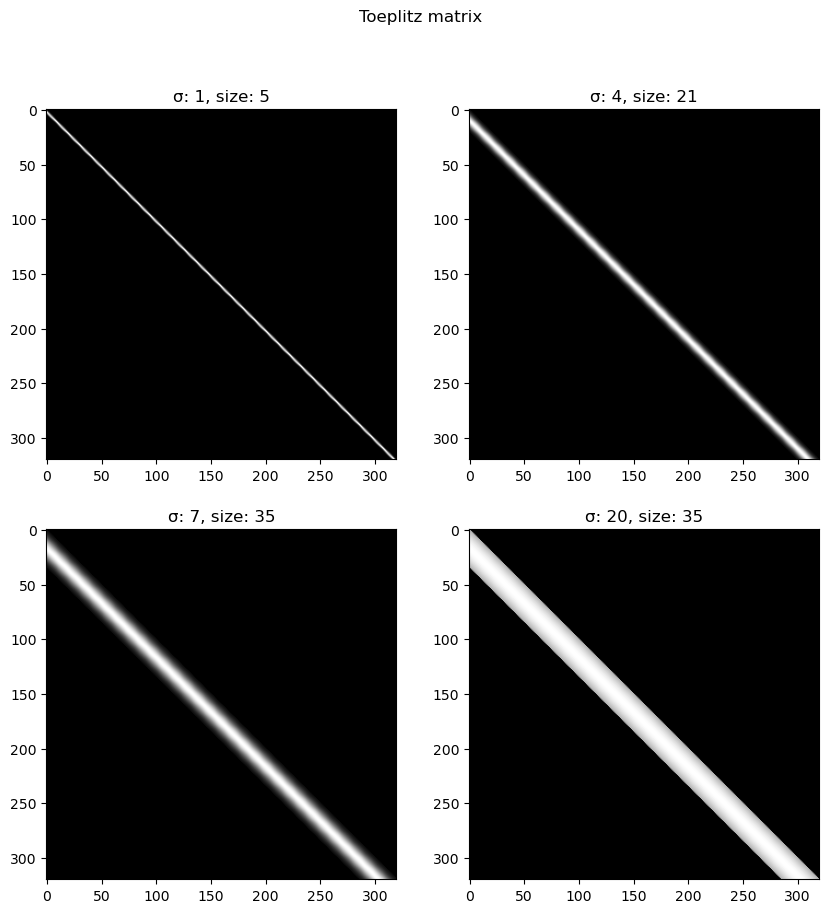

In [57]:
from scipy.linalg import toeplitz

def get_convolution_matrix(kernel, n):
    """ Create a Toeplitz matrix for discrete 1d convolution.

    :param kernel: 1d convolution kernel.
    :param n: Size of the signal, which should be convolved with the kernel.
    :returns: 2d matrix of size (n,n) for convolution by matrix-vector multiplication.
    """
    t_matrix = toeplitz(np.pad(array=kernel, pad_width=(0, n - len(kernel)), mode='constant', constant_values=0), np.zeros(n))
    return t_matrix

list_A_psf = [get_convolution_matrix(kernel, len(f_true)) for kernel in list_h_psf]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Toeplitz matrix')
for i, (sigma, size) in enumerate(options):
    ax = axs[i//2, i%2]
    ax.imshow(list_A_psf[i], cmap='gray')
    ax.set_title(f"σ: {sigma}, size: {size}")

plt.show()

In [58]:
# This cell contains hidden tests.


In [59]:
# This cell contains hidden tests.


### Convolution with the Toeplitz matrix 
Convolution with the Toeplitz matrix $g = Af_\text{true}$
* Apply the Toeplitz matrix in `list_A_psf` to `f_true`
* Save the outputs in the variable `list_g_toe` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_g_toe` in the same order of the parameter options in the axes `ax`
* Plot `f_true` in the axes `ax` (after `list_g_toe`)
* Show the legend in the axes `ax`

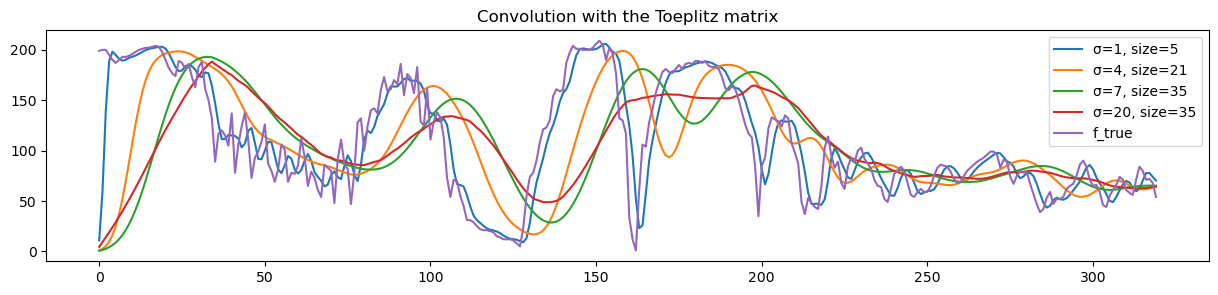

In [60]:
list_g_toe = [np.dot(t_matrix, f_true) for t_matrix in list_A_psf]

fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
ax.set_title('Convolution with the Toeplitz matrix')

for i, (sigma, size) in enumerate(options):
    ax.plot(list_g_toe[i], label=f"σ={sigma}, size={size}")

ax.plot(f_true, label="f_true")

ax.legend()
plt.show()

In [61]:
# This cell contains hidden tests.


In [62]:
# This cell contains tests.

for g_cov, g_toe in zip(list_g_cov, list_g_toe):
    np.testing.assert_almost_equal(g_cov, g_toe) # zero-padding

### Question: Matrix expression
* What's the advantage to use the matrix expression of convolution $g = Af_\text{true}$ for inverse problems?

1. Efficiency: When dealing with large datasets or complex kernels, direct convolution operations can be computantionally expensive. By formulating this to a matrix multiplication, we can leverage highly optimized linear algebra libraries to perform this operation efficiently.
2. Flexibility: The matrix representation allows for easy manipulation and combination of different convulational operations. This way customized convolutions can be created or multiple combined.
3. Inverse Problems: The matrix representation provides a convenient framework for solving inverse problems since it can be solved using a linear system of equations with well established methods such as least squares or regularization methods.
4. Regularization: Regularization methods such as Ridge regression can easily be incorporated into the matrix formulation which helps to mitigate the effects of noise or ill-conditioned problems.


### Fourier transform
Fourier transform of the Gaussian kernels $\mathcal{F}\{h\}$ (using `numpy.fft.fft()`)
* Pad zeros to both sides of the kernels in `list_h_psf`
* Adjust the kernels as long as `f_true`
* Shift the origin of the kernels to the first element of the array
* Apply the Fourier transform to the shifted padded kernels
* Save the outputs in the variable `list_h_fft` (as `list` of `numpy.array`)

Display the result
* Plot the absolute value of the outputs in `list_h_fft` in the same order of the parameter options in the axes `ax`
* Plot the outputs properly in the frequency domain
* Show the legend in the axes `ax`

Text(0.5, 1.0, 'Fourier transform')

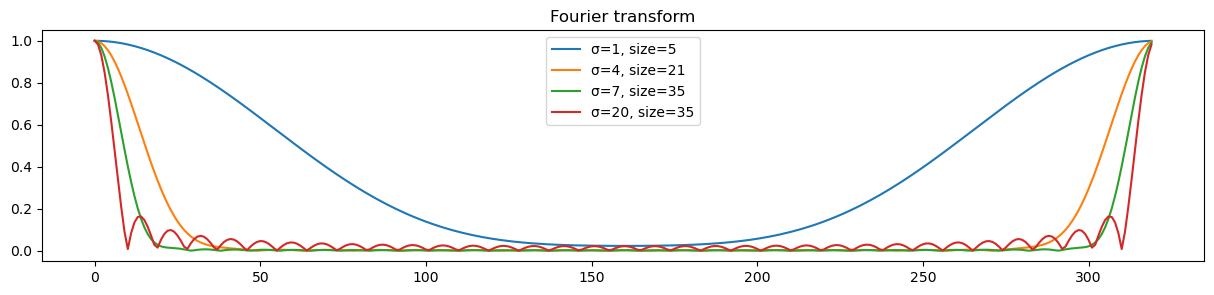

In [63]:
list_h_padded = [np.pad(h, pad_width=(0, len(f_true) - len(h))) for h in list_h_psf]

list_h_fft = [np.fft.fft(kernel) for kernel in list_h_padded]

fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
for i, (sigma, size) in enumerate(options):
    ax.plot(np.abs(list_h_fft[i]), label=f"σ={sigma}, size={size}")

ax.legend()
ax.set_title('Fourier transform')

In [64]:
# This cell contains hidden tests.


In [65]:
# This cell contains hidden tests.


### Convolution with the Fourier transform
Convolution with the Fourier transform $g = \mathcal{F}^{-1}\{ \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\} \}$
* Apply the transformed kernels in `list_h_fft` to `f_true`
* Return the absolute value of the inverse transform
* Save the outputs in the variable `list_g_dft` (as `list` of `numpy.array`)

Display the result
* Plot the outputs in `list_g_dft` in the same order of the parameter options in the axes `ax`
* Plot `f_true` in the axes `ax` (after `list_g_dft`)
* Show the legend in the axes `ax`

Text(0.5, 1.0, 'Convolution with the Fourier transform')

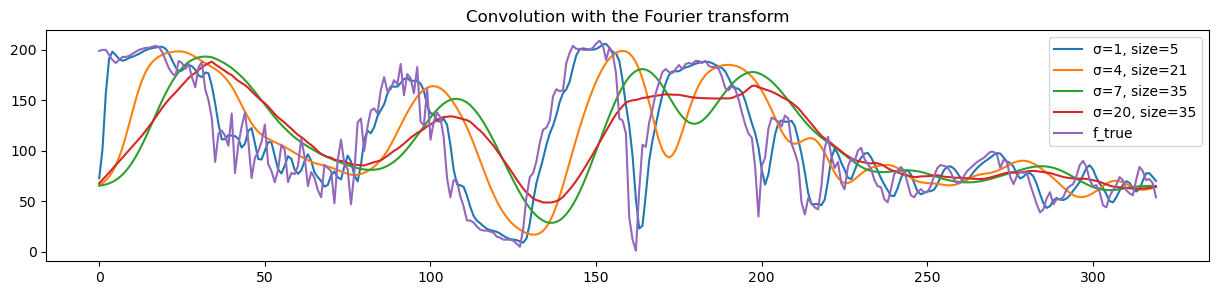

In [69]:
# Perform convolution with the Fourier transform
list_g_dft = []
for h_fft in list_h_fft:
    # Absolute value of convolved transformed kernel with fft of f_true
    list_g_dft.append(np.abs(np.fft.ifft(h_fft * np.fft.fft(f_true))))

fig, ax = plt.subplots(1, 1, figsize = (15, 3))  # Create a figure and an axes.
for i, (sigma, size) in enumerate(options):
    ax.plot(np.abs(list_g_dft[i]), label=f"σ={sigma}, size={size}")
ax.plot(f_true, label="f_true")

ax.legend()
ax.set_title('Convolution with the Fourier transform')

In [67]:
# This cell contains hidden tests.


In [68]:
# This cell contains tests.

for g_cov, g_dft in zip(list_g_cov, list_g_dft):
    np.testing.assert_almost_equal(g_cov[40:-40], g_dft[40:-40]) # with boundary effects

### Question: Fourier transform
* What's the advantage to use the Fourier transform for convolution $\mathcal{F}\{g\} = \mathcal{F}\{h\} \mathcal{F}\{f_\text{true}\}$ for inverse problems?

1. Efficiency: With the Fourier transform we can perform convolution in the frequency domain where convolution becomes a simple pointwise multiplication operation. Especially for large datasets or kernels this can be significantly faster since it reduces the computational complexity from $O(\mathcal{n}^{2})$ to $O(n \log(n))$
2. Decoupling of Operations: By transfering to the frequency domain we can apply operations on the spatial and frequency components of the data separately such as denoising or deblurring.